2025-03-07 09:18:22,594 - INFO - Configuration:
dataset: cifar10
project: data-loader
root: ./data
download: true
batch_size: 32
num_workers: 2
seed: 42
val_ratio: 0.1

2025-03-07 09:18:22,612 - INFO - CIFAR10 dataset found in ./data. Skipping download.
2025-03-07 09:18:23,614 - INFO - Datasets loaded and split successfully:
2025-03-07 09:18:23,615 - INFO - Training set size: 50000
2025-03-07 09:18:23,616 - INFO - Validation set size: 5000
2025-03-07 09:18:23,618 - INFO - Test set size: 10000


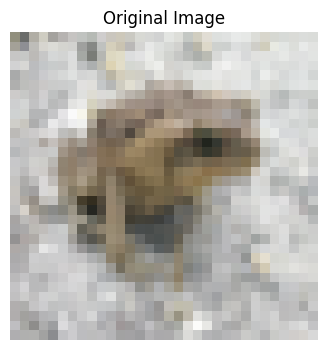

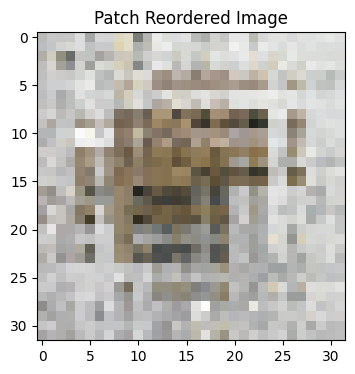

In [10]:
import random
import torch
import matplotlib.pyplot as plt
from data import load_and_split_data, Config
from data_gen import generate_patch_shuffled_negatives
from omegaconf import OmegaConf

# Create OmegaConf config explicitly from dataclass
cfg = OmegaConf.structured({
    "dataset": "cifar10",
    "project": "data-loader",
    "root": "./data",
    "download": True,
    "batch_size": 32,
    "num_workers": 2,
    "seed": 42,
    "val_ratio": 0.1
})

# Load dataset using your existing function
train_loader, _, _ = load_and_split_data(cfg)

# Fetch a single image
images, _ = next(iter(train_loader))
image = images[random.randint(0, images.size(0))]  # Shape: (C, W, H)

# Show original image
plt.figure(figsize=(4,4))
plt.title("Original Image")
plt.imshow(image.permute(1,2,0))
plt.axis('off')
plt.show()

# Apply patch_reorder (negative sample generation)
k = 3  # example kernel size
negative_image = generate_patch_shuffled_negatives(image.unsqueeze(0), k=k)[0]

# Show perturbed (negative) image
plt.figure(figsize=(4,4))
plt.title("Patch Reordered Image")
plt.imshow(negative_image.permute(1,2,0))
plt.show()
